# Textual Analysis of Southern Appalachian Folkmusic
## Anna Remler
## Dr. Brooks Jessup
## June 30, 2021
## Digital Humanities 101

> ![Alt Text](https://memelane.com/___image___?url=https%3A%2F%2Fi.imgur.com%2FJu4ct.jpg)

In [1]:
# for scientific computing
!pip install Numpy
!pip install Scipy


# For language
!pip install --upgrade gensim
!pip install python-Levenshtein
!pip install nltk

In [2]:
#import gensim
import gensim 
#import logging
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import string
import re

#NLP library
import spacy

#for text analysis
import spacy
import smart_open
from gensim.test.utils import common_corpus, common_dictionary, get_tmpfile, common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#Clean-up crew
from nltk.corpus import stopwords

#Visual data
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.decomposition import PCA

# Lets get this party started. I am going to insert and clean up the corpuses.

## Start by inserting the Early Modern English training set

In [3]:
!pwd

/Users/annaremler/DIGHUM101-2021/PROJECT_SU2021/Notebooks(Project)


In [4]:
# Was having issues so checked if it was there.
def get_text(filename):
    path_name = "./EME_texts/{}".format(filename)
    
    lines = []
    if os.path.isfile(path_name):
        print("File exists")
        f = open(path_name)
        for line in f.readlines():
            lines.append(line)
        f.close()
    else:
        print("File does not exist! IOError has occured")
    return lines

In [6]:
# Define a variable with the file path for the directory containing the text files
# Go two directories up (../../) 
# and into the Data directory
# then into the
# Make sure to take out hidden files (x.startswith)

dir_path = [x for x in os.listdir("EME_texts") if not x.startswith('.')]

# View the contents of this directory
dir_path

['A_General_History_of_the_Pyrates.txt',
 'Lectures_on_Elocution.txt',
 'Gullivers_travels.txt',
 'Dr.Faustus.txt',
 'Not_Paul,_But_Jesus.txt',
 'Philosophical_Transactions_of_the_Royal_Society.txt',
 'Complete_works_of_Shakey.txt',
 'A_Journal_of_the_Plague_Year.txt',
 'Leviathan.txt',
 'The_Life_and_Adventures_of_Robinson_Crusoe .txt',
 'The_Beggars_Opera.txt',
 'A_Modest_Proposal .txt',
 'The_Devil_is_an_Ass.txt',
 'Robinson_Crusoes_Part_2.txt',
 'Polite_Conversation.txt',
 "Bacon's_Essay.txt",
 'An_Essay_Towards_a_New_Theory.txt',
 'The_Fortunes_and_Misfortunes_of_the_Famous_Moll_Flanders.txt']

In [7]:
# Where am I?
%pwd

'/Users/annaremler/DIGHUM101-2021/PROJECT_SU2021/Notebooks(Project)'

In [8]:
# Designate an empty dictionary to store the filename and text as columns
for_dataframe1 = {}

# Loop through the directory of text files and open and read them
for file in dir_path:
    with open("./EME_texts/" + file, "r", encoding="latin-1") as to_open:
         for_dataframe1[file] = to_open.read()
            
# Create and append the dataframe with two columns - the file name and the text itself
EME_data = (pd.DataFrame.from_dict(for_dataframe1, 
                                       orient = "index")
                .reset_index().rename(index = str, 
                                      columns = {"index": "File", 0: "Text"}))

In [9]:
EME_data.head()

,File,Text
0,A_General_History_of_the_Pyrates.txt,"A GENERAL\nHISTORY\nOF THE\nPYRATES,\n\nFROM\n..."
1,Lectures_on_Elocution.txt,"It has been a long time since all men, who hav..."
2,Gullivers_travels.txt,THE CONTENTS\n\n\n ...
3,Dr.Faustus.txt,\n\nTHE TRAGICAL HISTORY OF DOCTOR FAUSTUS\n\n...
4,"Not_Paul,_But_Jesus.txt","\n\n\nINTRODUCTION.\n\n\nIllustrious, in the c..."


In [10]:
list(EME_data[0:1]["Text"])

["A GENERAL\nHISTORY\nOF THE\nPYRATES,\n\nFROM\nTheir first RISE and SETTLEMENT in the Island of\n_Providence_, to the present Time.\n\nWith the remarkable Actions and Adventures of the two Female Pyrates\nMary Read and Anne Bonny;\n\n\nContain'd in the following Chapters,\n\nIntroduction.\nChap. I. Of Capt. _Avery_.\nII. Of Capt. _Martel_.\nIII. Of Capt. _Teach_.\nIV. Of Capt. _Bonnet_.\nV. Of Capt. _England_.\nVI. Of Capt. _Vane_.\nVII. Of Capt. _Rackam_.\nVIII. Of Capt. _Davis_.\nIX. Of Capt. _Roberts_.\nX. Of Capt. _Anstis_.\nXI. Of Capt. _Worley_.\nXII. Of Capt. _Lowther_.\nXIII. Of Capt. _Low_.\nXIV. Of Capt. _Evans_.\nXV. Of Capt. _Phillips_.\nXVI. Of Capt. _Spriggs_.\nAnd their several Crews.\n\nTo which is added.\nA short ABSTRACT of the Statute and Civil\nLaw, in Relation to Pyracy.\n\nThe second EDITION, with considerable ADDITIONS\nBy Captain Charles Johnson.\n\n\n_LONDON_:\nPrinted for, and sold by _T. Warner_, at the _Black-Boy_ in\n_Pater-Noster-Row_, 1724.\n\n\n\n\n\nTH

### Now lets clean up the EME Corpus

In [133]:
# Keep only letters
EME_data["Text_processed"] = EME_data["Text"].map(lambda x: re.sub('[^a-zA-Z\s]', '', x))

#FOUND QUICKER PATH
# # Remove punctuation
# M_data["Text_processed"] = M_data["Text"].map(lambda x: re.sub('[,\.!?_^><*;:#\[\]"\(\)\{\}]', '', x))
# # Remove digits
# M_data['Text_processed'] = M_data['Text_processed'].str.replace('\d+', '')
# # Remove "/n"
# M_data['Text_processed'] = M_data['Text_processed'].str.replace('\n', ' ')

# Convert to lowercase
EME_data["Text_processed"] = EME_data["Text_processed"].map(lambda x: x.lower())

# Remove stopwords
stop = stopwords.words("english")
EME_data['Text_tokens'] = EME_data['Text_processed'].apply(lambda x: [word for word in x.split() if word not in stop])

EME_data['Text_processed'] = EME_data['Text_tokens'].apply(lambda x: ' '.join(x))

# Punctuation and digits are gone!
list(EME_data[0:1]["Text_processed"])

['general history pyrates first rise settlement island providence present time remarkable actions adventures two female pyrates mary read anne bonny containd following chapters introduction chap capt avery ii capt martel iii capt teach iv capt bonnet v capt england vi capt vane vii capt rackam viii capt davis ix capt roberts x capt anstis xi capt worley xii capt lowther xiii capt low xiv capt evans xv capt phillips xvi capt spriggs several crews added short abstract statute civil law relation pyracy second edition considerable additions captain charles johnson london printed sold warner blackboy paternosterrow preface taken ordinary pains collecting materials compose following history could satisfied selves thing wanting might render entirely satisfactory publick reason subjoined work short abstract laws force pyrates made choice particular cases curious could meet heretofore tried appear actions adjudged pyracy possible book may fall hands masters ships honest mariners frequently cont

In [134]:
data1 = []
for i, doc in enumerate(EME_data['Text_tokens'].values):
    data1.append(gensim.models.doc2vec.TaggedDocument(doc, [0]))

## Am doing the same thing for Modern texts

In [67]:
# Define a variable with the file path for the directory containing the text files
# Go two directories up (../../) 
# and into the Data directory
# then into the
# Make sure to take out hidden files (x.startswith)

dir_path = [x for x in os.listdir("Modern_texts") if not x.startswith('.')]

# View the contents of this directory
dir_path

['Anarchism_and_Other_Essays.txt',
 'For_Whom_the_Bell_Tolls.txt',
 'The_Grapes_of_Wrath.txt',
 'The_Tin_Soldier.txt',
 'In_Our_Time.txt',
 'Tarzan_of_the_Apes .txt',
 'The _Initiates_of_the_Flame .txt',
 'This_Side_of_Paradise.txt',
 'The_Wonderful_Wizard_of_Oz.txt',
 'The_Beautiful_and_Damned.txt',
 'The_Gods_of_Mars.txt',
 'All_of_Louisa_M_Alcott.txt',
 "The_Devil's_Dictionary.txt",
 'Common_Cause.txt',
 'Babbit.txt',
 'Of_Mice_and_Men.txt',
 'All_of_Mark_Twain.txt',
 'The_Great_Gatsby.txt']

In [68]:
# Designate an empty dictionary to store the filename and text as columns
for_dataframe2 = {}

# Loop through the directory of text files and open and read them
for file in dir_path:
    with open("./Modern_texts/" + file, "r", encoding="latin-1") as to_open:
         for_dataframe2[file] = to_open.read()
            
# Create and append the dataframe with two columns - the file name and the text itself
M_data = (pd.DataFrame.from_dict(for_dataframe2, 
                                       orient = "index")
                .reset_index().rename(index = str, 
                                      columns = {"index": "File", 0: "Text"}))

In [69]:
M_data.head()

,File,Text
0,Anarchism_and_Other_Essays.txt,The Project Gutenberg EBook of Anarchism and O...
1,For_Whom_the_Bell_Tolls.txt,For Whom the Bell Tolls\nBy\n\nErnest Hemingwa...
2,The_Grapes_of_Wrath.txt,To CAROL who willed this book.\nTo TOM who liv...
3,The_Tin_Soldier.txt,"The Project Gutenberg eBook, The Tin Soldier, ..."
4,In_Our_Time.txt,"ï»¿The Project Gutenberg EBook of In Our Time,..."


In [130]:
# Keep only letters
M_data["Text_processed"] = M_data["Text"].map(lambda x: re.sub('[^a-zA-Z\s]', '', x))

#FOUND QUICKER PATH
# # Remove punctuation
# M_data["Text_processed"] = M_data["Text"].map(lambda x: re.sub('[,\.!?_^><*;:#\[\]"\(\)\{\}]', '', x))
# # Remove digits
# M_data['Text_processed'] = M_data['Text_processed'].str.replace('\d+', '')
# # Remove "/n"
# M_data['Text_processed'] = M_data['Text_processed'].str.replace('\n', ' ')

# Convert to lowercase
M_data["Text_processed"] = M_data["Text_processed"].map(lambda x: x.lower())

# Remove stopwords
stop = stopwords.words("english")
M_data['Text_tokens'] = M_data['Text_processed'].apply(lambda x: [word for word in x.split() if word not in stop])

M_data['Text_processed'] = M_data['Text_tokens'].apply(lambda x: ' '.join(x))

# Punctuation and digits are gone!
list(M_data[0:1]["Text_processed"])

['project gutenberg ebook anarchism essays emma goldman ebook use anyone anywhere cost almost restrictions whatsoever may copy give away reuse terms project gutenberg license included ebook online wwwgutenbergorg title anarchism essays author emma goldman posting date march ebook release date april language english character set encoding ascii start project gutenberg ebook anarchism essays produced eva html version al haines anarchism essays emma goldman biographic sketch hippolyte havel contents biographic sketch preface anarchism really stands minorities versus majorities psychology political violence prisons social crime failure patriotism menace liberty francisco ferrer modern school hypocrisy puritanism traffic women woman suffrage tragedy womans emancipation marriage love drama powerful disseminator radical thought emma goldman propagandism suppose trade nobody follow trade may work industry slave die reputation mendicant motives persons pursue profession must different trade dee

In [131]:
data2 = []
for i, doc in enumerate(M_data['Text_tokens'].values):
    data2.append(gensim.models.doc2vec.TaggedDocument(doc, [1]))

## Now that the training texts has been cleaned up, lets do the whole thing again for the test corpus (aka: English Folk Songs from the Southern Appalachians)

### Page of Document:
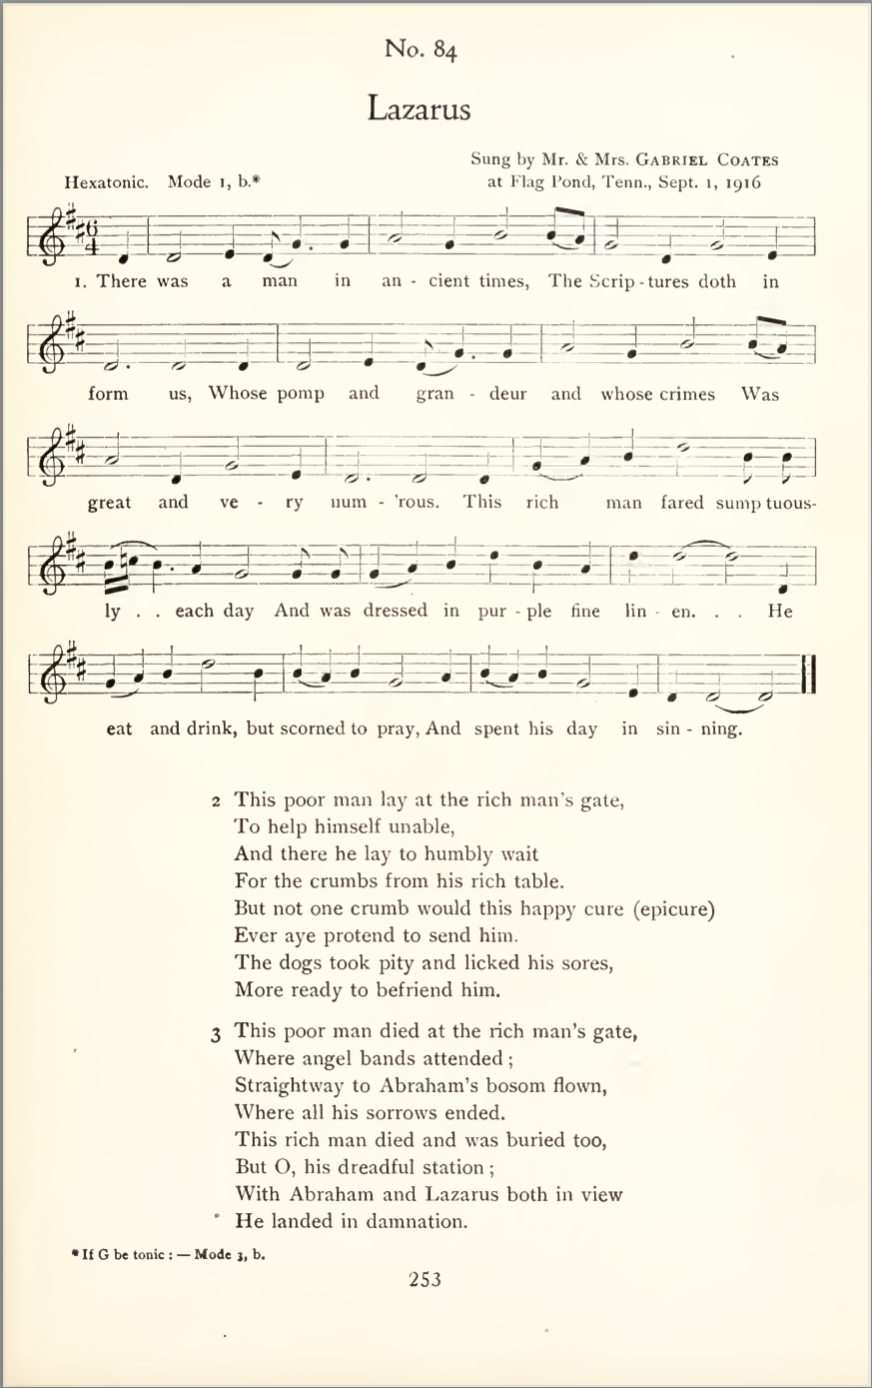

### In comparison to the text:
> form us, Whose pomp and gran - deur and whose crimes Was<br>
> = -1- I- <br>
> n- <br>
> -7^- <br>
> i <br>
> -si- <br>
> :q=:j: <br>
> ±1 <br>
> :f= <br>
> great and ve - ry num - 'rous. This rich <br>
> :i <br>
> man fared sumptuous- <br>
> ^=f%=f^ <br>
> EEEEEhEEEEEIE^<br> 
> ly 
> each day And was dressed in pur - pie fine lin - en. . 


In [72]:
# Define a variable with the file path for the directory containing the text files
# Go two directories up (../../) 
# and into the Data directory
# then into the
# Make sure to take out hidden files (x.startswith)

dir_path = ["englishfolksongs(122_songs).txt"]

# View the contents of this directory
dir_path

['englishfolksongs(122_songs).txt']

In [73]:
# Designate an empty dictionary to store the filename and text as columns
test_dataframe = {}

# Loop through the directory of text files and open and read them
for file in dir_path:
    with open("englishfolksongs(122_songs).txt", encoding="utf-8") as to_open:
#          print(to_open)
         test_dataframe[file] = to_open.read()
            
# Create and append the dataframe with two columns - the file name and the text itself
test_data = (pd.DataFrame.from_dict(test_dataframe, 
                                       orient = "index")
                .reset_index().rename(index = str, 
                                      columns = {"index": "File", 0: "Text"}))

In [74]:
test_data

,File,Text
0,englishfolksongs(122_songs).txt,BALLADS \n\n\n\nNo. I \n\n\n\nThe False Knight...


In [75]:
list(test_data[0:1]["Text"])

['BALLADS \n\n\n\nNo. I \n\n\n\nThe False Knight Upon the Road \n\nA \n\nSung by Mrs. T. G. Coaxes \nHexatonic. Mode , b. at Flag Pond, Tenn., Sept. i,  \n\n\n\nI. The knight met a \n\n\n\nchild in the road. \n\n\n\n\n\n. wheayou \n\n\n\ngoing to  said the knight in the road. I\'m \n\n\n\n\n\n\ngoing  \n\n\n\nto my school, said the child as he stood. He stood and he stood and it\'s \n\n\n\n\n\nwell because he stood. I\'m agoing to my school, said the child as he stood. \n\n\n\n O what ayou going thefor   \nFor to learn the Word of God. \n\n O what have you got the \n\nI have got my bread and cheese. \n\n O won\'t you give me some   \nNo, ne\'er a bite nor crumb. \n\n I wish you was on the sands. \n\nYes, and a good staff in my hands. \n\n I wish you was in the sea. \n\nYes, and a good boat under me. \n\n I think I hear a bell. \n\nYes, and it\'s ringing you to hell. \n\n\nThe False Knight Upon the Road \nB \n\nSung by Mrs. Jane Gentry \nPentatonic. Mode , no th . at Hot Springs, N. C, 

In [129]:
## I realize that I am using a code meant for multiple texts for a singular one
# Keep only letters
test_data["Text_processed"] = test_data["Text"].map(lambda x: re.sub('[^a-zA-Z\s]', '', x))

#FOUND QUICKER PATH
# Remove punctuation
# test_data["Text_processed"] = test_data["Text"].map(lambda x: re.sub('[,\.!?_%^■*•=#:|£&«»/±+<>:;~""]', '', x))
# # Remove punctuation
# # test_data["Text_processed"] = test_data["Text_processed"].map(lambda x: re.sub('[1234567890]', '', x))
# # Remove digits
# # test_data['Text_processed'] = test_data['Text_processed'].str.replace('\d+''\n', '')

# Convert to lowercase
test_data["Text_processed"] = test_data["Text_processed"].map(lambda x: x.lower())

# Remove stopwords
stop = stopwords.words("english")
test_data['Text_tokens'] = test_data['Text_processed'].apply(lambda x: [word for word in x.split() if word not in stop])
test_data['Text_processed'] = test_data['Text_tokens'].apply(lambda x: ' '.join(x))

# Punctuation and digits are gone! 
list(test_data[0:1]["Text_processed"])

['ballads false knight upon road sung mrs g coaxes hexatonic mode b flag pond tenn sept knight met child road wheayou going said knight road im going school said child stood stood stood well stood im agoing school said child stood ayou going thefor learn word god got got bread cheese wont give neer bite crumb wish sands yes good staff hands wish sea yes good boat think hear bell yes ringing hell false knight upon road b sung mrs jane gentry pentatonic mode th hot springs n c sept wheayou going says knight road im going school said child stood stood stood well thought stood im agoing school said child stood ayou eating im aeating bread cheese wishd sea good boat wishd well deep hell lady isabel elf knight hexatonic mode sung miss elizabeth coit amherst mass july bring fathers gold moof mothers money two best horses fathers stable daily athirtythree brought fathers gold moof mothers money two best horses fathers stable daily athirtythree rode milkwhite steed rode bay together came north 

In [132]:
data3 = []
for i, doc in enumerate(test_data['Text_tokens'].values):
    data3.append(gensim.models.doc2vec.TaggedDocument(doc, [2]))

# To train the model, we’ll need to associate a tag/number with each document of the training corpus.

In [78]:
# INVALID AFTER RECODING
#def read_corpus(data, tokens_only=False):
#     for i, line in enumerate(data):
#         tokens = gensim.utils.simple_preprocess(line)
#         if tokens_only:
#             yield tokens
#         else:
#              # For training data, add tags
#             yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [135]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=30, min_count=5, epochs=50)
model.build_vocab(data1 + data2 + data3)

In [136]:
model.train(data1 + data2+data3, total_examples=model.corpus_count, epochs=model.epochs)

In [137]:
vector = model.infer_vector(test_data)

In [138]:
print(vector)

[-0.0068184  -0.00559764  0.00822241 -0.002661   -0.004081   -0.01462803
  0.0086115   0.0130387  -0.00399042  0.00889641 -0.00051661  0.00856322
 -0.00704739  0.00522337  0.01120499  0.00869955  0.00786153  0.00746133
 -0.01165489  0.01452528 -0.00902577 -0.00166579  0.01495998 -0.00601526
 -0.01548423  0.01046261 -0.00639681  0.00665837  0.00230591  0.00511119]


In [139]:
sims = model.dv.most_similar([vector], topn=len(model.dv))

In [140]:
print(sims)

[(0, 0.17028558254241943), (1, -0.29058194160461426), (2, -0.31582820415496826)]


# Now that everything is down, lets visualize the data

In [141]:
doc_tags = list(range(len(data1)+len(data2)+len(data3))) # = to number of documents in data
# print(doc_tags)
X = model[doc_tags]
print(X[0])

[-1.3807311   0.74634165 -0.5865322   1.6111482  -1.5933857  -0.9923142
 -0.24744542  0.34969616 -3.1091254  -0.39363602  0.8240305  -0.5536749
 -0.5589541   1.6306556  -1.6008728  -0.7403539   0.61401653  1.6100495
  1.0233464  -2.3994253  -0.21720043  0.65289426  0.16019666  0.44076374
  3.5112433  -0.7460374   0.6730132   0.73564    -0.16239062  0.29800782]


In [194]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
y = [pair[1][0] for pair in data1 + data2 + data3]
# y = y.append(2) # this will add label '2' for appalachian on the condition that appalachian is the last text in the X_r dataset

# lda = LinearDiscriminantAnalysis(n_components=2)
#X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# for i in range(len(X_r)):
#     plt.scatter(X_r[i, 0], X_r[i, 1])
#     plt.annotate("Moby Dick", (X_r[i, 0]+1, X_r[i, 1]+1))


explained variance ratio (first two components): [0.14543211 0.14144681]


In [195]:
y0 = [True if i==0 else False for i in y]
y1 = [True if i==1 else False for i in y]
y2 = [True if i==2 else False for i in y]
ylist = [y0, y1,y2]

In [196]:
print(len(ylist))

3


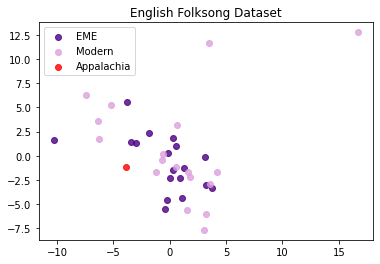

In [197]:
"""for col, i, target_name in zip(colors, [0, 1], ["EME", "Modern", "Appalachia"]):
#     print(color)
#     print(X_r[ylist[i], 0], X_r[ylist[i], 1])
#     print(target_name) , X_r[ylist[i], 2]
    plt.scatter (X_r[ylist[i], 0], X_r[ylist[i], 1], color=col, alpha=.8, lw=lw, label=target_name)
# plt.annotate("Text of interest", (X_r[textofinterestindex, 0]+0.5, X_r[textofinterestindex, 1]+0.5))
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('English folksong dataset')
"""
# plt.figure()
#len(ylist) = 2
for color, i, target_name in zip(['indigo', 'plum', 'red'], [0, 1,2], ["EME", "Modern", "Appalachia"]):
     plt.scatter(X_r[ylist[i], 0], X_r[ylist[i], 1], alpha=.8, color=color,
                     label=target_name)
     plt.legend(loc='best', shadow=False, scatterpoints=1)
     plt.title('English Folksong Dataset')

plt.show()

# Resources

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py <brk>
https://studymachinelearning.com/jaccard-similarity-text-similarity-metric-in-nlp/